# Is Batman somewhere?

### Imports

In [34]:
library("ggplot2")
library("dplyr")
library("corrplot")

### First look at the data
File headers:

In [6]:
myData <- read.table(file="data/bats.csv", sep=";", skip=3, header=T)
names(myData)

[1] "Species" "Diet"    "Clade"   "BOW"     "BRW"     "AUD"     "MOB"    
[8] "HIP"

## Study of the relationship between brain weight and body mass

In [7]:
phyto=myData[(myData$Diet==1),]
head(phyto)

,Species,Diet,Clade,BOW,BRW,AUD,MOB,HIP
,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Rousettus aegyptiacus,1,I,136.3,2070.00,9.88,105.77,125.97
2,Epomops franqueti,1,I,120.0,2210.00,10.44,107.80,159.80
3,Eonycteris spelaea,1,I,58.7,1310.00,5.48,67.00,97.70
4,Cynopterus sphinx,1,I,48.3,1184.33,4.77,65.27,95.40
5,Dobsonia praedatrix,1,I,184.0,3028.00,7.09,213.43,233.30
6,Eidolon helvum,1,I,262.0,4290.00,12.77,208.70,258.10


### Brain weight vs Body mass

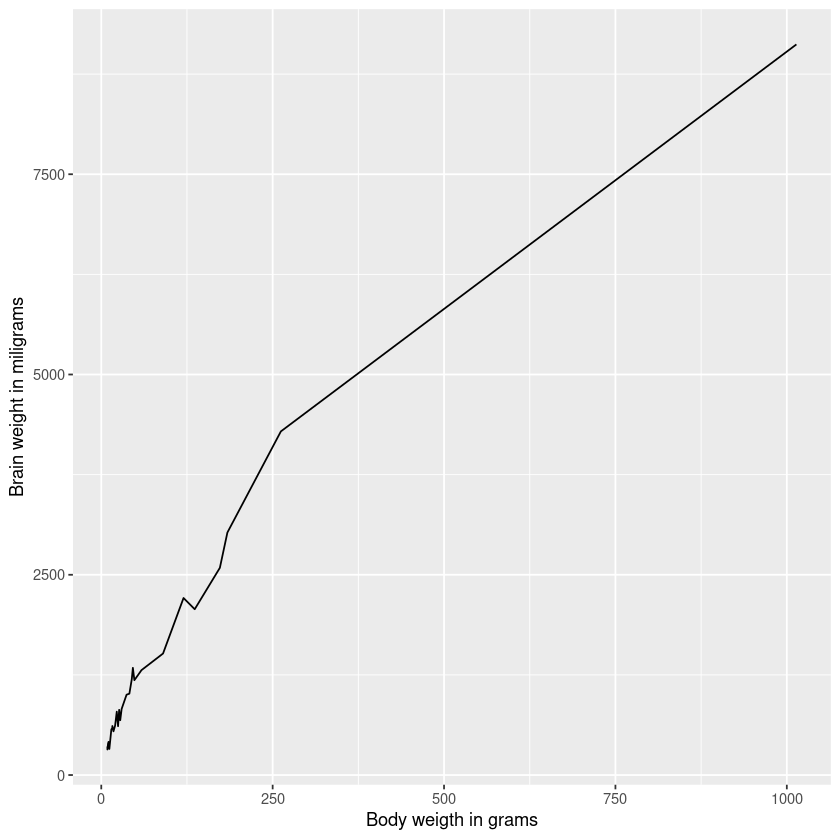

In [14]:
ggplot(data = phyto, aes(x = BOW, y = BRW)) + 
    geom_line() +
    xlab("Body weigth in grams") +
    ylab("Brain weight in miligrams")

### Simple regression model

In [25]:
reg1 = lm(BRW ~ BOW, data=phyto)

In [26]:
summary(reg1)


Call:
lm(formula = BRW ~ BOW, data = phyto)

Residuals:
    Min      1Q  Median      3Q     Max 
-628.32 -233.94  -65.74  158.26 1308.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 623.4469    81.4762   7.652 3.14e-08 ***
BOW           8.9999     0.3972  22.659  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 396.9 on 27 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:  0.9482 
F-statistic: 513.4 on 1 and 27 DF,  p-value: < 2.2e-16


> Estimated: $ brainWeight = 8.9999 \times bodyMass + 623.4469 $

##### What is the estimate of the intercept?
623
##### What is the value of the test statistics for the model test?
Test statistics = 513.4
##### What is the H0 hypothesis of this test?
Hypothesis H0: Brain weight is independant of body mass.
##### What can be said about the relationship between brain weight and body mass?
H0 is false, since the p-value is different from 0. Thus, the model concludes the variable BOW is affecting BRW.
##### How much is the coefficient of determination?
Around 9

In [27]:
anova(reg1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BOW,1,80888380,80888379.9,513.4154,4.208907e-19
Residuals,27,4253838,157549.6,NA,NA


##### What additional information is presented in this table?

The model's and residual variance values

##### What is the sum of the residual squares?

4253838

### Diagnostic graph

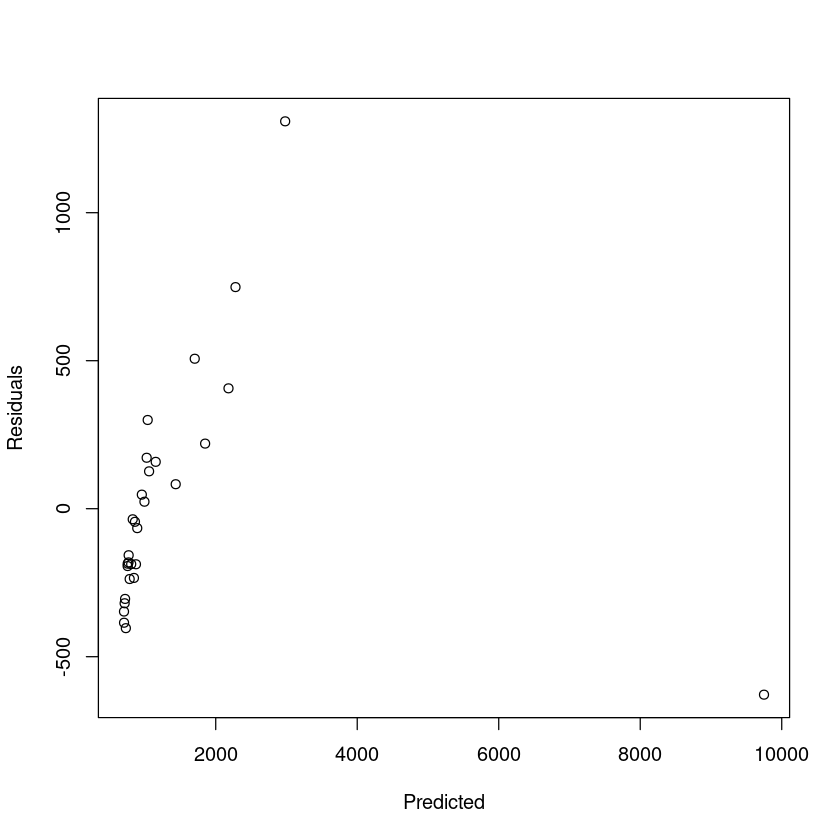

In [28]:
plot(reg1$fitted.values, reg1$residuals, xlab="Predicted", ylab="Residuals")

> In the graph above we can see an outlier of almost 10000 mg of brain weight on the down-right corner. 

> Now, we'll redo the model without this point.

[1] 7


Call:
lm(formula = BRW ~ BOW, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-269.76  -93.33    8.73  112.93  322.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 346.5452    35.4920   9.764 3.48e-10 ***
BOW          14.5099     0.4285  33.860  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 141.8 on 26 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.977 
F-statistic:  1147 on 1 and 26 DF,  p-value: < 2.2e-16


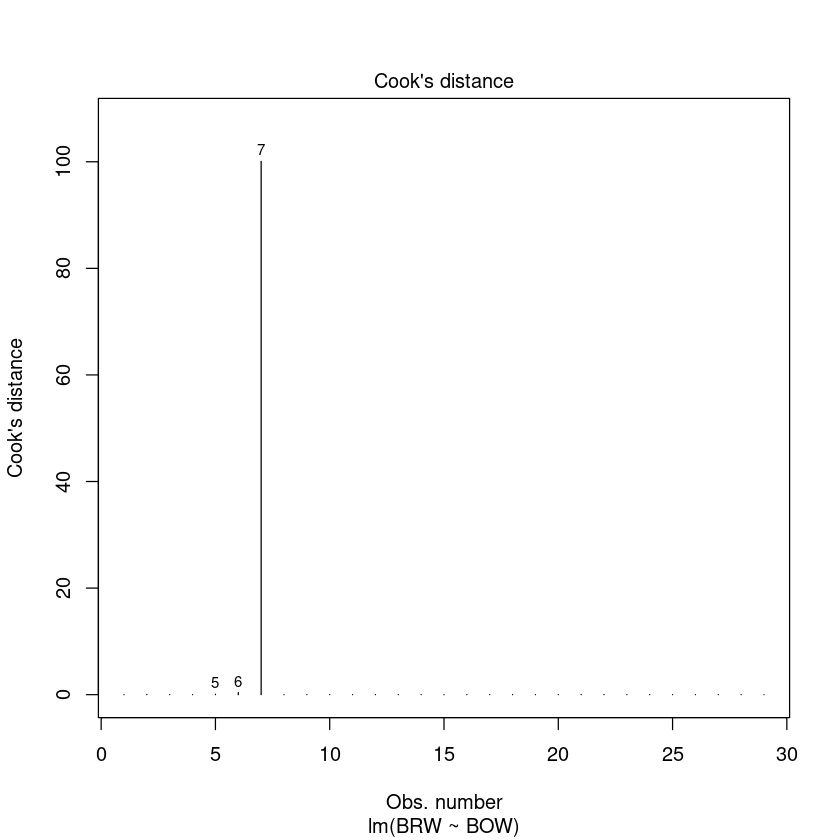

In [29]:
plot(reg1,4)
which(phyto$BRW>8000)
phytobis=phyto[which(phyto$BRW<8000),]
reg2 = lm(BRW ~ BOW, data=phytobis)
summary(reg2)

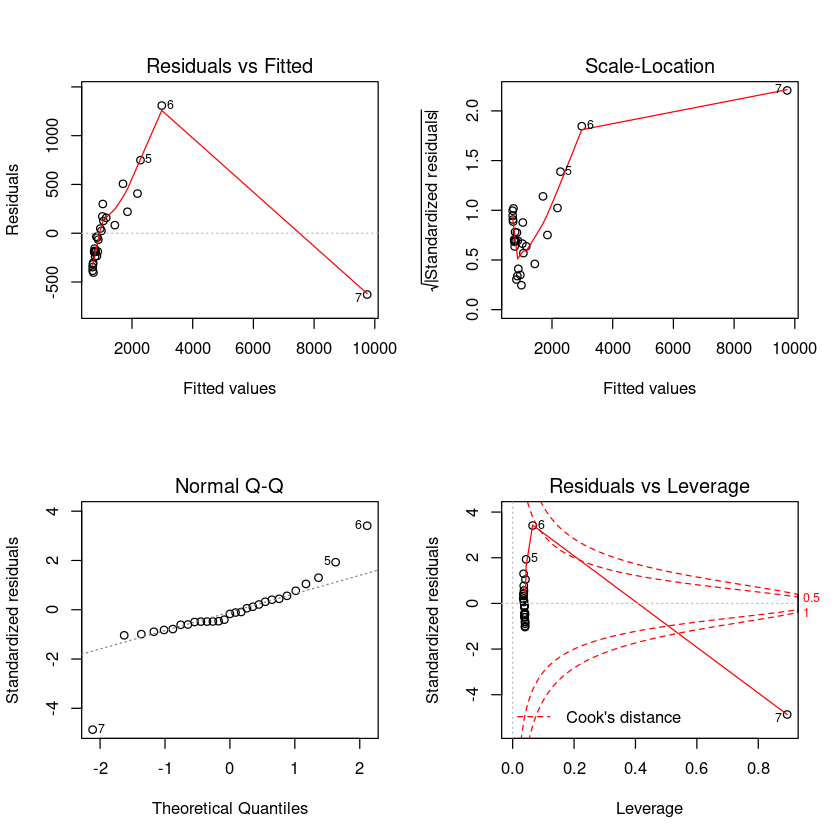

In [30]:
par(mfcol=c(2,2))
plot(reg1)

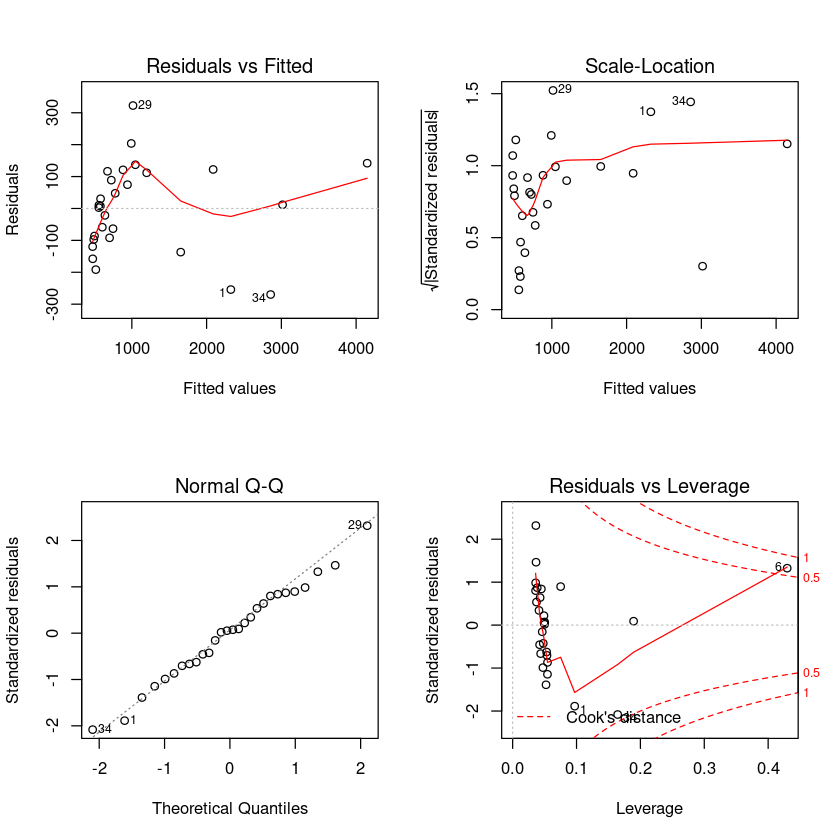

In [31]:
par(mfcol=c(2,2))
plot(reg2)

> Removing the outlier has shown an increase on the coefficient of determination from 95% to 97.78%. In other words, the second model better predicts the brain weight from body mass. 

## Study of the contribution to the total weight of each part of the brain

### Variable Correlation Matrix

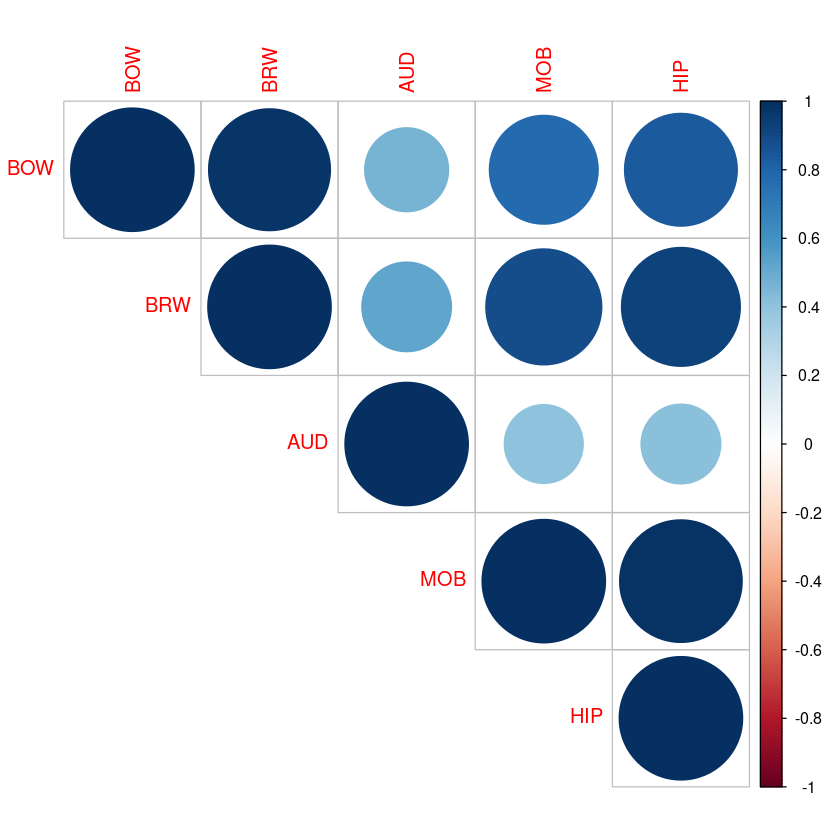

In [35]:
phytoNum=phyto[, c(4:8)]
mat.cor=cor(phytoNum)
corrplot(mat.cor, type="upper")

In [37]:
cor.test(phyto$BRW,phyto$HIP)
cor.test(phyto$BRW,phyto$MOB)
cor.test(phyto$BRW,phyto$AUD)


	Pearson's product-moment correlation

data:  phyto$BRW and phyto$HIP
t = 12.91, df = 27, p-value = 4.574e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8502663 0.9658107
sample estimates:
      cor 
0.9276811 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$MOB
t = 9.7964, df = 27, p-value = 2.203e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7644185 0.9442114
sample estimates:
      cor 
0.8834215 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$AUD
t = 3.2338, df = 27, p-value = 0.003215
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2007495 0.7497021
sample estimates:
      cor 
0.5283792 


> We can conclude that the hippocampus and olfactory zone valumes have the highest correlations with brain weight.

### Multiple regression model

In [38]:
multipleRegressionModel = lm(BRW ~ AUD + MOB + HIP, data = phytobis)
summary(multipleRegressionModel)
anova(multipleRegressionModel)


Call:
lm(formula = BRW ~ AUD + MOB + HIP, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.55  -68.84    9.88   61.66  375.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -312.692     76.628  -4.081  0.00043 ***
AUD           47.989      6.067   7.910 3.85e-08 ***
MOB           -2.444      3.257  -0.750  0.46034    
HIP           15.981      2.960   5.399 1.52e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 158.5 on 24 degrees of freedom
Multiple R-squared:  0.9744,	Adjusted R-squared:  0.9712 
F-statistic: 304.5 on 3 and 24 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AUD,1,6817133.4,6817133.42,271.20969,1.397093e-14
MOB,1,15409397.1,15409397.05,613.04035,1.341315e-18
HIP,1,732652.6,732652.61,29.14751,1.519221e-05
Residuals,24,603264.6,25136.02,NA,NA


> According to the model, AUD has the most influence on BRW and MOB the least.

## Link between volume of the auditory part and diet

### Auditory volume vs Diet


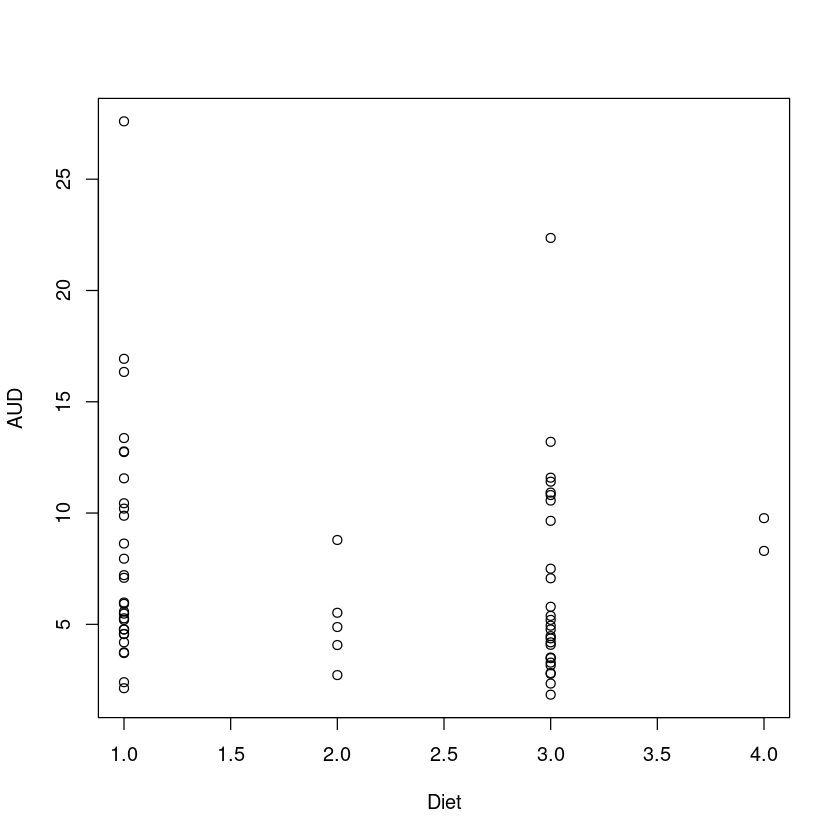

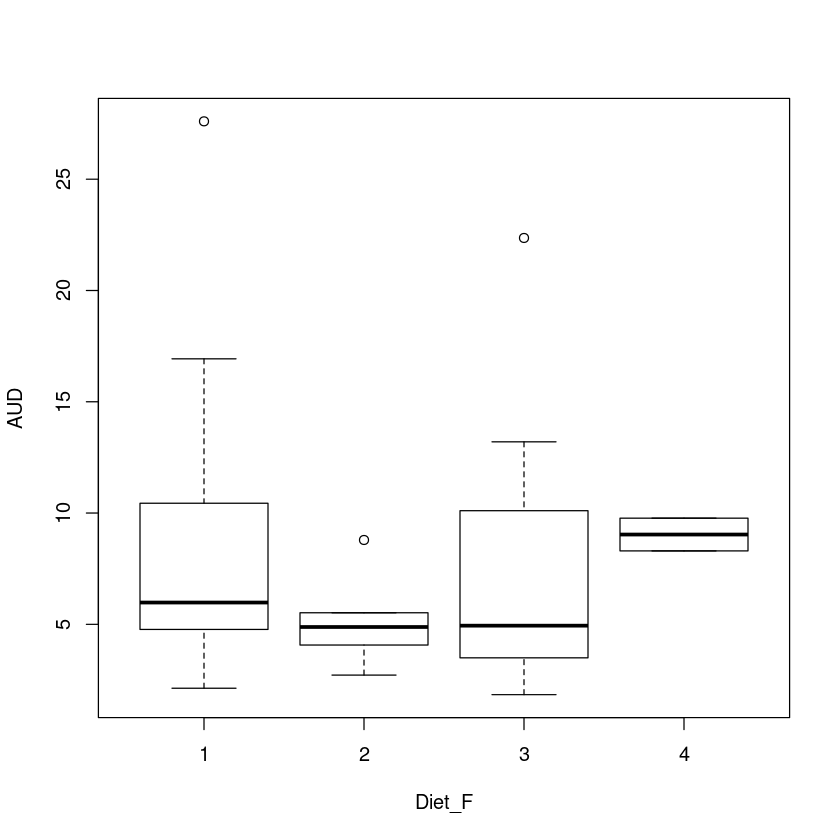

In [40]:
myData$Diet_F = as.factor(myData$Diet)
with(myData, plot(AUD~Diet))
with(myData, plot(AUD~Diet_F))

> The second graph shows an ideia of mean value and distribution with the box plots and seems to be more informative, despite ommiting the sample size for each diet, differently from the first graph.

### Regression Analysis

In [41]:
lm = lm(AUD~Diet_F, data=myData)
anova(lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Diet_F,3,66.06941,22.02314,0.9292727,0.4323339
Residuals,59,1398.26034,23.69933,NA,NA


> The high squared sum of residuals indicates that we may not be able to modle auditory volume with the diets. The result is not very surprising, since a bat's diet does not seem to be something able to change its auditory volume, or vice-versa.